# 🚘 **About Dataset:**

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower, the mileage it gives, and many more. 🚗 Car price prediction is one of the major research areas in machine learning.

**📊 Dataset Overview**

🚗 Car_Name: Categorical variable representing the model of the vehicle, including both cars and motorcycles.

📅 Year: Numerical (integer) indicating the manufacturing year, ranging from 2003 to 2018.

💰 Selling_Price: Numerical (float) representing the price at which the vehicle is being sold.

📈 Present_Price: Numerical (float) indicating the current market value of the vehicle.

🛣️ Driven_kms: Numerical (integer) showing the kilometers driven.

⛽ Fuel_Type: Categorical variable indicating the type of fuel used (e.g., Petrol, Diesel, CNG).

🛒 Selling_type: Categorical variable denoting whether the vehicle is sold by a Dealer or an Individual.

⚙️ Transmission: Categorical variable indicating the type of transmission:

🧑‍🔧 Manual: The driver manually changes gears using a gear stick and clutch pedal.
🤖 Automatic: The car automatically changes gears without driver intervention.

👤 Owner: Numerical (integer) indicating the number of previous owners the vehicle has had.

## Import Libraries

In [1]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import from scikit-learn library
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import pickle

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

print('Libraries imported successfully!')

Libraries imported successfully!


## Explore Data

In [2]:
# Load the data
df = pd.read_csv('car data.csv')

print('Data loaded successfully')

Data loaded successfully


In [3]:
# display the first 5 rows of the data
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# shape of data
print(f'Rows = {df.shape[0]}\n')
print(f'Columns = {df.shape[1]}')

Rows = 301

Columns = 9


In [5]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# statistical summary of data
num_sum = df.describe()
palette = sns.color_palette('viridis', as_cmap=True)
num_sum.style.background_gradient(cmap=palette)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Data Cleaning

Missing Values

In [7]:
# missing values
missing = df.isnull().sum()
print(missing)

print('\n There is no missing values in the dataset')

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

 There is no missing values in the dataset


Duplicate Rows

In [8]:
# duplicate values
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows = {duplicates}")

# drop duplicates
print("After dropping duplicates")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows = {df.duplicated().sum()}")

Number of duplicate rows = 2
After dropping duplicates
Number of duplicate rows = 0


Outliers

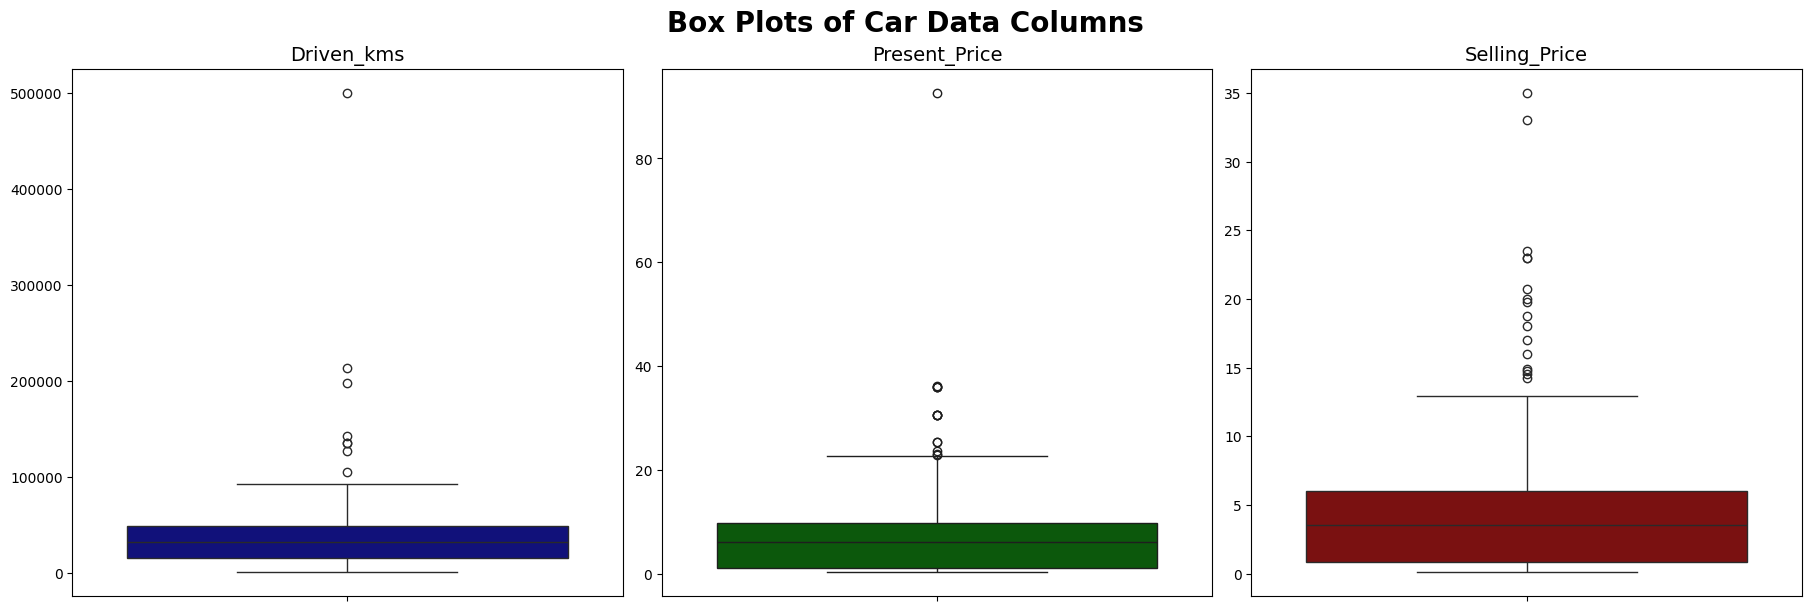

In [9]:
# Set up the figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Create individual box plots using Seaborn
sns.boxplot(ax=axes[0], y=df['Driven_kms'], color='darkblue', showfliers=True)
axes[0].set_title('Driven_kms', fontsize=14)
axes[0].set_ylabel("")  # Remove y-axis label to match uniformity

sns.boxplot(ax=axes[1], y=df['Present_Price'], color='darkgreen', showfliers=True)
axes[1].set_title('Present_Price', fontsize=14)
axes[1].set_ylabel("")

sns.boxplot(ax=axes[2], y=df['Selling_Price'], color='darkred', showfliers=True)
axes[2].set_title('Selling_Price', fontsize=14)
axes[2].set_ylabel("")

# Add a global title for the figure
fig.suptitle('Box Plots of Car Data Columns', fontsize=20, weight='bold')

# Display the combined figure
plt.show()

In [10]:
# outliers using z-score method of Driven_kms Selling_Price and Present_Price columns using numpy
from scipy import stats
z = np.abs(stats.zscore(df[['Driven_kms', 'Selling_Price', 'Present_Price']]))
outliers = (z > 3).sum()
print(f'There are total {outliers.sum()} outliers in Driven_kms, Selling_Price and Present_Price columns using Z-score method')

print('_'*100, '\n')

# outliers using iqr method Driven_kms Selling_Price and Present_Price columns
Q1 = df[['Driven_kms', 'Selling_Price', 'Present_Price']].quantile(0.25)
Q3 = df[['Driven_kms', 'Selling_Price', 'Present_Price']].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[['Driven_kms', 'Selling_Price', 'Present_Price']] < (Q1 - 1.5 * IQR)) | (df[['Driven_kms', 'Selling_Price', 'Present_Price']] > (Q3 + 1.5 * IQR))
print(f'There are total {outliers.sum().sum()} outliers in Driven_kms, Selling_Price and Present_Price columns using IQR method')

There are total 16 outliers in Driven_kms, Selling_Price and Present_Price columns using Z-score method
____________________________________________________________________________________________________ 

There are total 38 outliers in Driven_kms, Selling_Price and Present_Price columns using IQR method


remove inconsistency

In [11]:
# Check the shape of the data before removing inconsistency
print(f'shape of data before removing inconsistency : Rows = {df.shape[0]} & Columns = {df.shape[1]}\n')

# List of bike-related keywords to identify bike rows
bike_keywords = ['Royal Enfield', 'KTM', 'Hero', 'Yamaha', 'TVS', 'Hyosung', 'UM'] # Remove these bike rows

# Filter out rows where Car_Name contains any of the bike keywords
df = df[~df['Car_Name'].str.contains('|'.join(bike_keywords), case=False, na=False)]

# i will remove the rows that shows imbalancing in my data
df = df[~((df['Owner'] == 3) | (df['Year'] == 2018) | (df['Car_Name'] == '800'))]

# Check the shape of the data after removing inconsistency
print(f'shape of data after removing inconsistency : Rows = {df.shape[0]} Columns = {df.shape[1]}\n')

# Display message
print('Successfully remove inconsistency')

shape of data before removing inconsistency : Rows = 299 & Columns = 9

shape of data after removing inconsistency : Rows = 242 Columns = 9

Successfully remove inconsistency


## Feature Engineering

Create New Features

In [12]:
# Calculate Age of the Car
current_year = 2025
df['Age_of_car'] = current_year - df['Year']

# Compute Car Depreciation
df['Car_depreciation'] = (df['Present_Price'] - df['Selling_Price']).round(3)

# Depreciation Per Year
df['Depreciation_per_year'] = (df['Car_depreciation'] / df['Age_of_car']).round(3)

# Determine Depreciation Rate
df['Depreciation_rate'] = ((df['Present_Price'] - df['Selling_Price']) / df['Present_Price']).round(3)
df['Depreciation_rate'].fillna(0, inplace=True)  # Handle division by zero

# Extract Car Brand from Car_Name
df['Brand'] = df['Car_Name'].str.split().str[0]

# Create Car Age Category
df['Car_Condition'] = pd.cut(df['Age_of_car'],
                          bins=[0, 3, 8, 15, 23],
                          labels=['new', 'young', 'old', 'very old'])

# Create Mileage Category
df['Car_Mileage'] = pd.cut(df['Driven_kms'],
                              bins=[500, 100000, 300000, 500000],
                              labels=['low', 'medium', 'high'])

print('Feature Engineering completed successfully')

Feature Engineering completed successfully


Type Conversion

In [13]:
# Convert object type columns to category type
categorical_columns = ['Brand', 'Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
df[categorical_columns] = df[categorical_columns].astype('category')

# Display the data types of the updated dataset
print("Data types after conversion : \n")
print(df.dtypes)

Data types after conversion : 

Car_Name                 category
Year                        int64
Selling_Price             float64
Present_Price             float64
Driven_kms                  int64
Fuel_Type                category
Selling_type             category
Transmission             category
Owner                       int64
Age_of_car                  int64
Car_depreciation          float64
Depreciation_per_year     float64
Depreciation_rate         float64
Brand                    category
Car_Condition            category
Car_Mileage              category
dtype: object


# **My Objective:**

The primary goal of this project is to train a machine learning model capable of accurately predicting car prices based on various features. Although I am not performing univariate, bivariate, or multivariate analysis at this stage, the focus will be on preparing the data for model training. Now, let's move forward with the data preprocessing phase to get the data ready for the machine learning model.

## Data Preprocessing

Distribution of target variable

Skewness of Selling_Price: 2.4389193616177165


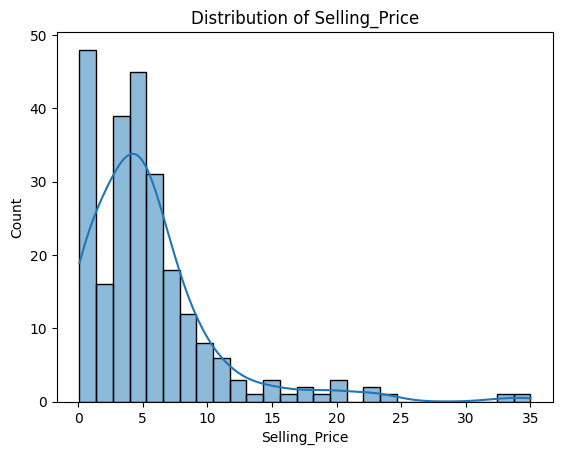

In [14]:
# Calculate skewness
skewness = df['Selling_Price'].skew()
print(f'Skewness of Selling_Price: {skewness}')

# Plot the distribution of Selling_Price
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling_Price')
plt.show()

**Why Skewness is a Problem:**

If the target variable is highly skewed, it can affect the performance of regression models, especially linear models, which assume that the target variable is normally distributed.

Skewness can lead to biased predictions and poor model performance

**Interpreting Skewness:**

If the skewness is between -0.5 and 0.5, the distribution is
approximately symmetric.

If the skewness is > 0.5, the distribution is positively skewed (right-tailed).

If the skewness is < -0.5, the distribution is negatively skewed (left-tailed)

**How to Handle Skewness:**

If the target variable is highly skewed, you can apply a transformation to make it more normally distributed. Common transformations include:

Log Transformation: np.log1p(Selling_Price)
Square Root Transformation: np.sqrt(Selling_Price)
Box-Cox Transformation: scipy.stats.boxcox(Selling_Price)

Skewness of Selling_Price: 0.5968308145210136


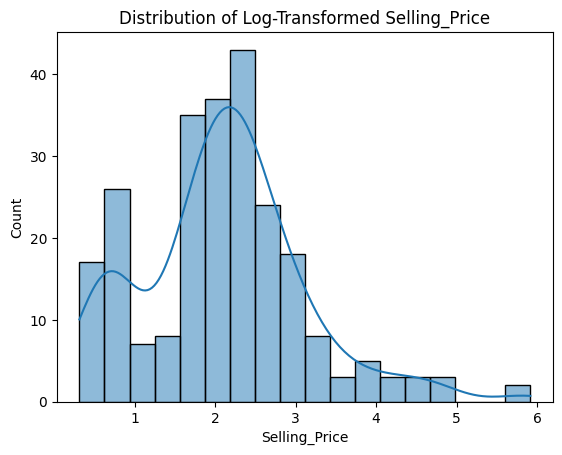

In [15]:
# Apply square root transformation to Selling_Price
df['Selling_Price'] = np.sqrt(df['Selling_Price'])

# Calculate skewness
skewness = df['Selling_Price'].skew()
print(f'Skewness of Selling_Price: {skewness}')

# Plot the transformed distribution
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Log-Transformed Selling_Price')
plt.show()

## Correlation

In [16]:
# Select only numerical features
numerical_features = df.select_dtypes(include=["number"])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,Year,Selling_Price,Present_Price,Driven_kms,Owner,Age_of_car,Car_depreciation,Depreciation_per_year,Depreciation_rate
Year,1.000000,0.315371,-0.037999,-0.511267,-0.080186,-1.000000,-0.346926,-0.219465,-0.857425
Selling_Price,0.315371,1.000000,0.807972,-0.041442,-0.124517,-0.315371,0.451188,0.562089,-0.334233
Present_Price,-0.037999,0.807972,1.000000,0.150506,-0.095102,0.037999,0.864228,0.912086,0.084108
Driven_kms,-0.511267,-0.041442,0.150506,1.000000,-0.033499,0.511267,0.286928,0.244659,0.488203
Owner,-0.080186,-0.124517,-0.095102,-0.033499,1.000000,0.080186,-0.067642,-0.077802,0.095614
Age_of_car,-1.000000,-0.315371,0.037999,0.511267,0.080186,1.000000,0.346926,0.219465,0.857425
Car_depreciation,-0.346926,0.451188,0.864228,0.286928,-0.067642,0.346926,1.000000,0.977052,0.438537
Depreciation_per_year,-0.219465,0.562089,0.912086,0.244659,-0.077802,0.219465,0.977052,1.000000,0.358737
Depreciation_rate,-0.857425,-0.334233,0.084108,0.488203,0.095614,0.857425,0.438537,0.358737,1.000000


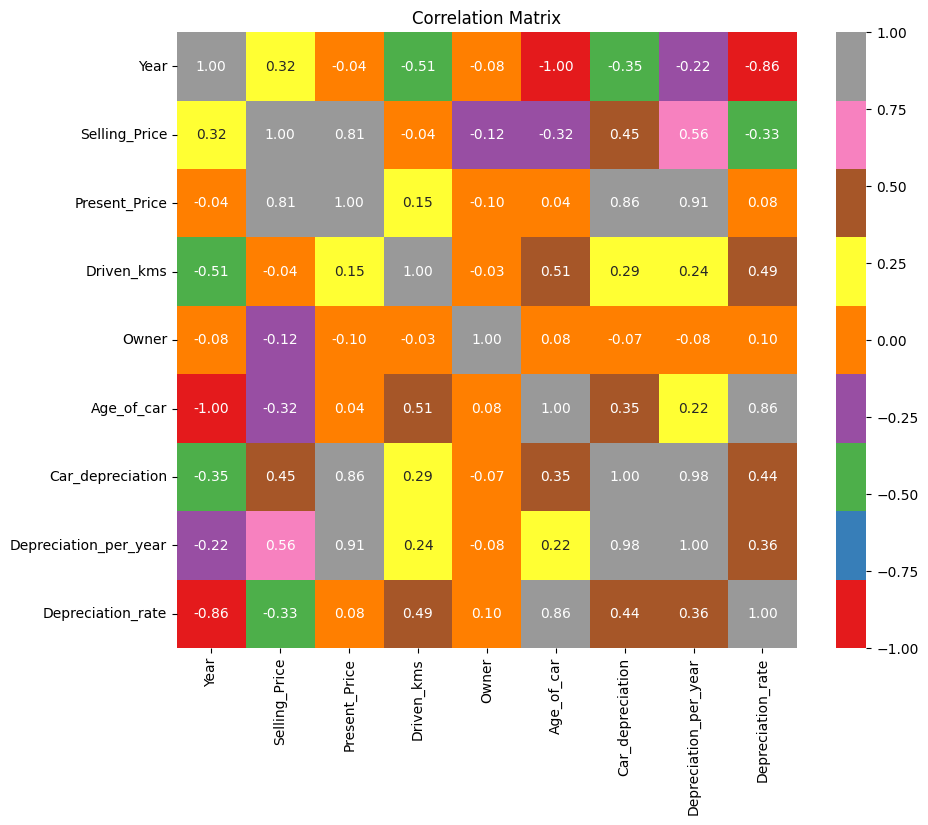

In [17]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Set1', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Drop unnecessary columns
df = df.drop(columns=['Car_Name'])

print("Successfully Droped the Column")

Successfully Droped the Column


## Build ML Model

In [19]:
# Separate features (X) and target (y)
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission', 'Brand', 'Car_Condition', 'Car_Mileage']
numerical_cols = ['Present_Price', 'Driven_kms', 'Age_of_car', 'Car_depreciation']

# Preprocessing pipeline
# Numerical columns: MinMax Scaling
# Categorical columns: OneHot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define a list of regression models to compare with additional hyperparameters
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Ridge Regression', Ridge(), {'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}),
    ('Lasso Regression', Lasso(), {'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}),
    ('Decision Tree', DecisionTreeRegressor(), {'regressor__max_depth': [None, 10, 20, 30], 'regressor__min_samples_split': [2, 5, 10]}),
    ('Random Forest', RandomForestRegressor(), {'regressor__n_estimators': [50, 100, 200], 'regressor__max_depth': [None, 10, 20], 'regressor__min_samples_split': [2, 5, 10]}),
    ('Gradient Boosting', GradientBoostingRegressor(), {'regressor__n_estimators': [50, 100, 200], 'regressor__learning_rate': [0.01, 0.1, 0.2], 'regressor__max_depth': [3, 5, 10]}),
    ('SVR', SVR(), {'regressor__C': [0.1, 1.0, 10.0], 'regressor__kernel': ['linear', 'rbf'], 'regressor__gamma': ['scale', 'auto']}),
    ('KNN', KNeighborsRegressor(), {'regressor__n_neighbors': [3, 5, 7, 9], 'regressor__weights': ['uniform', 'distance']}),
    ('XGBoost', XGBRegressor(), {'regressor__n_estimators': [50, 100, 200], 'regressor__learning_rate': [0.01, 0.1, 0.2], 'regressor__max_depth': [3, 5, 10]})
]

# Initialize a list to store model performance
results = []

# Loop through each model, train, and evaluate
for name, model, params in models:
    # Create a pipeline with preprocessor and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Evaluate the model
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

    print(f"{name}:")
    print(f"  Best Parameters: {grid_search.best_params_}")
    print(f"  MSE: {mse}")
    print(f"  MAE: {mae}")
    print(f"  R2 Score: {r2}")
    print()

# Convert results to a DataFrame and sort by R2 Score in descending order
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2 Score', ascending=False)

# Print the sorted results
print("Model Performance (Sorted by R2 Score):")
print(results_df)

# Print the best model
best_model_result = results_df.iloc[0]
print("\nBest Model:")
print(f"  Model: {best_model_result['Model']}")
print(f"  Best Parameters: {best_model_result['Best Parameters']}")
print(f"  MSE: {best_model_result['MSE']}")
print(f"  MAE: {best_model_result['MAE']}")
print(f"  R2 Score: {best_model_result['R2 Score']}")

Linear Regression:
  Best Parameters: {}
  MSE: 0.018208638233381355
  MAE: 0.09132994275967475
  R2 Score: 0.9833404904962773

Ridge Regression:
  Best Parameters: {'regressor__alpha': 0.01}
  MSE: 0.019194946324001743
  MAE: 0.09642897683056066
  R2 Score: 0.982438094128208

Lasso Regression:
  Best Parameters: {'regressor__alpha': 0.01}
  MSE: 0.2071147593653985
  MAE: 0.23861525610931825
  R2 Score: 0.8105058567376262

Decision Tree:
  Best Parameters: {'regressor__max_depth': 30, 'regressor__min_samples_split': 5}
  MSE: 0.051277610897637924
  MAE: 0.1513283965532872
  R2 Score: 0.9530849130435627

Random Forest:
  Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
  MSE: 0.11713309145173713
  MAE: 0.1418564278347372
  R2 Score: 0.8928321917746033

Gradient Boosting:
  Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
  MSE: 0.11888533578502626
  MAE: 0.136090

**Dump a Model & load it for prediction**

Save machine learning model for future use with techniques like joblib or pickle. Preserve

In [22]:
# Extract the best model from the results DataFrame
best_model_name = results_df.iloc[0]['Model']
best_model_params = results_df.iloc[0]['Best Parameters']

# Find the corresponding model object
best_model = None
for name, model, params in models:
    if name == best_model_name:
        best_model = model
        break

# Create a pipeline with the preprocessor and the best model
best_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model)
])

# Set the best parameters to the model
best_model_pipeline.set_params(**best_model_params)

# Fit the best model pipeline
best_model_pipeline.fit(X_train, y_train)


import os
current_directory = os.getcwd()
# Create the full file path
file_path = os.path.join(current_directory, 'best_model.pkl')
with open(file_path, 'wb') as file: # Changed to 'best_model.pkl'
    pickle.dump(best_model_pipeline, file)

# Load the model from the pickle file
with open(file_path, 'rb') as file: # Changed to 'best_model.pkl'
    loaded_model = pickle.load(file)

# Make predictions using the loaded model
loaded_model_predictions = loaded_model.predict(X_test)

# Evaluate the loaded model
loaded_model_mse = mean_squared_error(y_test, loaded_model_predictions)
loaded_model_mae = mean_absolute_error(y_test, loaded_model_predictions)
loaded_model_r2 = r2_score(y_test, loaded_model_predictions)

print(f"Loaded Model Evaluation:")
print(f"  MSE: {loaded_model_mse}")
print(f"  MAE: {loaded_model_mae}")
print(f"  R2 Score: {loaded_model_r2}")

Loaded Model Evaluation:
  MSE: 0.018208638233381355
  MAE: 0.09132994275967475
  R2 Score: 0.9833404904962773
